In [16]:
import keras
import tensorflow as tf
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

In [ ]:
fs = 250 # 250Hz of sampling frequency for the device
time_duration = floor(len(sig)/250) # time duration in s
sig = sig[0:time_duration] 
num_fft_slice = time_duration * 5
low_bound = 0.5
high_bound = 30

In [8]:
def filter_signal(sig, fs, low_pass_cutoff, high_pass_cutoff):
    nyquist = 0.5 * fs
    low_pass_cutoff = low_pass_cutoff / nyquist
    high_pass_cutoff = high_pass_cutoff / nyquist
    
    sig_filter = signal.firwin(100, [high_pass_cutoff, low_pass_cutoff], pass_zero="bandpass")
    
    filtered_signal = signal.filtfilt(sig_filter, [1.0], sig)
    
    return filtered_signal

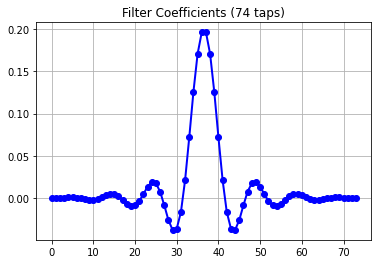

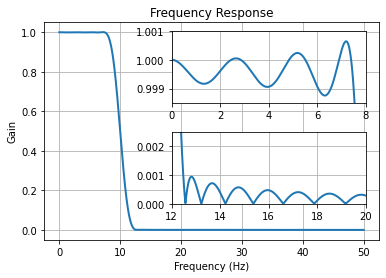

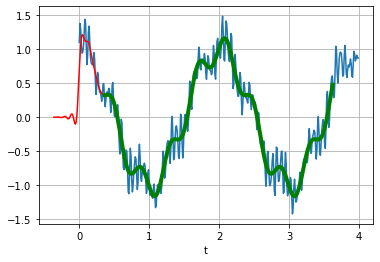

In [20]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

#We'll design the filter with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)


ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')

plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

In [32]:
# combining each 0.2s of data with the previous 0.8s
# for filetring

def filter_slice(signal):
  sig_arr = np.zeros((num_fft_slice, 50))
  for i in range(num_fft_slices):
    sig_arr[i] = sig[100*num_fft_slice, 100*num_fft_slice+99]
  return sig_arr

# further concatenate for FFT
def fft_slice(signal):
  sig_arr1 = np.zeros(num_fft_slice-10, 250)
  for i in range(5, num_fft_slice-5):
    sig_arr1[i] = np.concatenate(signal[i-4], signal[i-3], sig_arr[i-2], sig_arr[i-1], sig_arr[i])
  return sig_arr1

In [34]:
filter_signal_gen = np.vectorize(filter_signal)
filtered_sig = filter_signal_gen(filter_slice(sig), fs, 30, 0.5)
processed_sig = np.fft.fft(fft_slice(filtered_sig), n=256)